Name

Labpartner(s)

In [1]:
#import statements go here


# Class 11.1

#### Announcements

- Reminder **all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by end of the day 4/1 to pass the class.** The last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.
 
- Lab on Wed will be light on programming, as you have final research proposals this week. More on this on Wednesday, and you will have the oppertunity to work on them in the lab period then. See research proposal assignment on github

# Warmups 11.1

For warmups today you will share your plot animations.

# Lecture 11.1

### Agenda:
- Predator prey modeling. 

## Predator Prey Modeling

See original here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### Numerical solution using Python

A simple python code for solving these equations is shown below.

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [4]:
#define the time stepping scheme - Euler forward or "shooting" method
#euler step - 

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [5]:
# define the function that represents the Lotka-Volterra equations
#returns slopes 
#u is the x, y is the state of the system what the pop is at a given time 
#u = [x,y]

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [6]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])



In [7]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [8]:
# use a for loop to call the function rk2_step()
#go over the time steps
#go through the time steps and fill in the array u_euler
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    

In [9]:
u_euler

array([[10.        ,  2.        ],
       [ 9.86      ,  2.12      ],
       [ 9.7077616 ,  2.244232  ],
       ...,
       [ 0.87954346,  0.04493602],
       [ 0.88786462,  0.04353381],
       [ 0.89627944,  0.04217898]])

We will now plot the variation of population for each species with time.

In [10]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

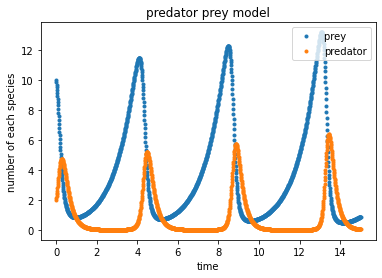

In [11]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

#time step is our chunkiness


## System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

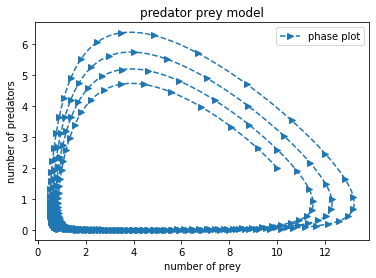

In [12]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 11.1

## E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

In [13]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

Make dt 10 times bigger (dt = 0.1)

In [14]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.1                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])



In [15]:
# use a for loop to call the function rk2_step()
#go over the time steps
#go through the time steps and fill in the array u_euler
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [16]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

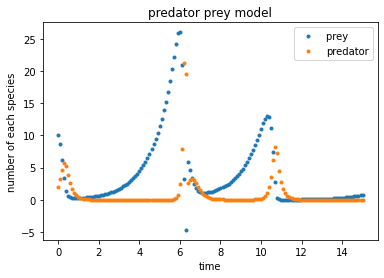

In [17]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

#time step is our chunkiness


Text(0.5, 1.0, 'predator prey model')

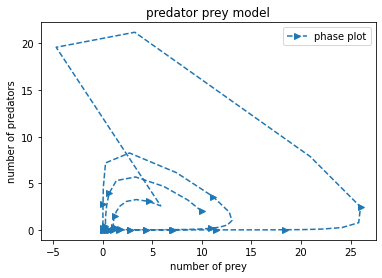

In [18]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Make dt 100 times smaller (dt = .0001)

In [19]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.0001                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])



In [20]:
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [21]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

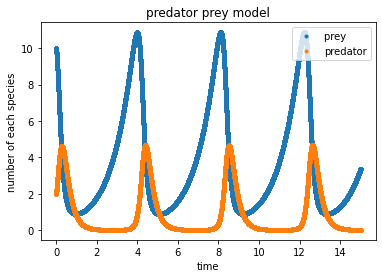

In [22]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")


Text(0.5, 1.0, 'predator prey model')

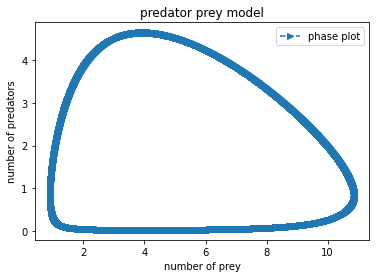

In [23]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Time step affects how many data points will be included in the graphs. 

When timestep was made 10 times bigger, the number of datapoints included in the graph decreased by a factor of 10. This made the predator and prey populations vs time graphs have less points and be less accurate. The phase plot looks very inacurrate as it demonstrates linearity in some sections a linear relationship between prey and predator populations, when it should be more cyclic. 

Making the timestep 100 times smaller increased the amount of datapoints included by a factor of 100. The predator and prey populations vs time graph became more accurate, since it shows a constant relationship in population growth of predatory and prey populations. There is no increasing trend in the populations as time goes by. The phase plot when the time step is decreased by 100 shows a ring, reflecting the cyclic relationshop between predator and prey populations, and has no outward growth 

## E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot. What happens if you start at the steady state? What happens if you start near the steady state?

I want to say the steady state is when y = 1/1.2 and x = 4.

In [24]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [25]:
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

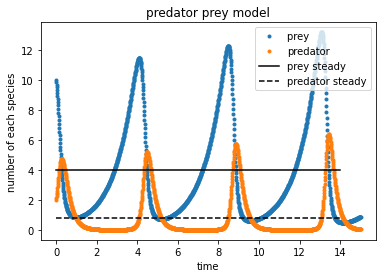

In [26]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot([0,14],[4,4], label = "prey steady", color="k")
plt.plot([0,14],[0.83,0.83], label = "predator steady",color="k",linestyle="--")

plt.legend(loc='upper right')


#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")


Text(0.5, 1.0, 'predator prey model')

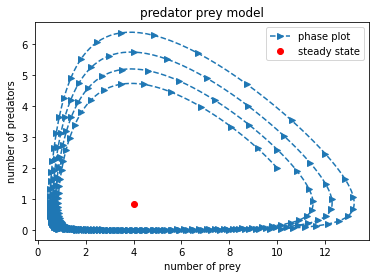

In [27]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Starting at Steady State

In [28]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = 0.83 #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

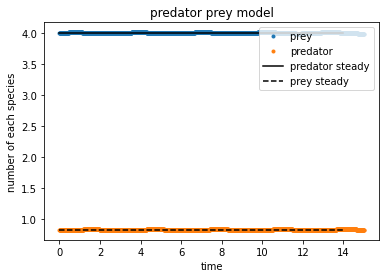

In [29]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot([0,14],[4,4], label = "predator steady", color="k")
plt.plot([0,14],[0.83,0.83], label = "prey steady",color="k",linestyle="--")
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

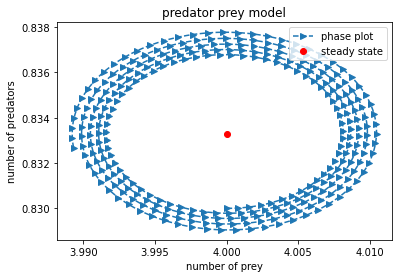

In [30]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.8333,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

If you start at steady state, the predator and prey vs time graph shows that there really is not change in the population levels. However, the phaseplot although perfectly elliptical, shows some outward growth indicating a possible increase in populations

Starting Near Steady State 
    
    initial y0 (initial predators) will be set to 1 (steady state is 0.833)

In [31]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = 1. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

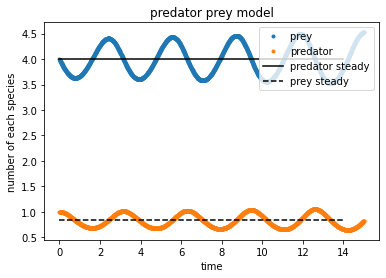

In [32]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot([0,14],[4,4], label = "predator steady", color="k")
plt.plot([0,14],[0.83,0.83], label = "prey steady",color="k",linestyle="--")
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

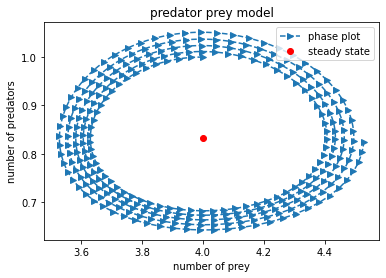

In [33]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.8333,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

By plotting near steady state, we can see that there are still fluctuations in population levels but they fluctuate around steady state levels.

## Another time stepping method with higher order of accuracy

## E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ?

In [34]:
#time stepping method'
#returns 

def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

Make dt 10 times larger (dt = .01)

In [35]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.1                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt) #CHANGE FROM EULER_STEP TO RUNGE KUTTA
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

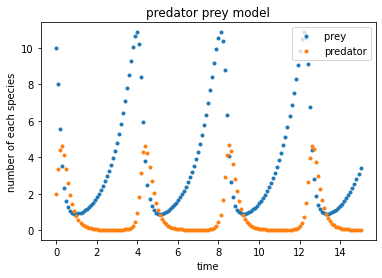

In [36]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

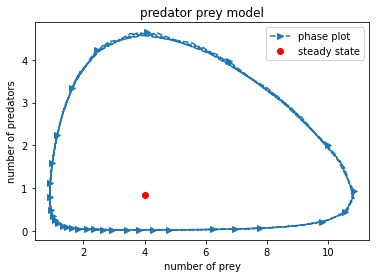

In [37]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Make dt 100 times smaller (dt = .0001)

In [38]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.0001                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt) #CHANGE FROM EULER_STEP TO RUNGE KUTTA
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

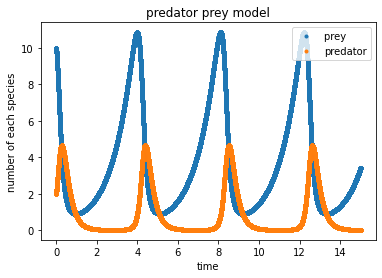

In [39]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

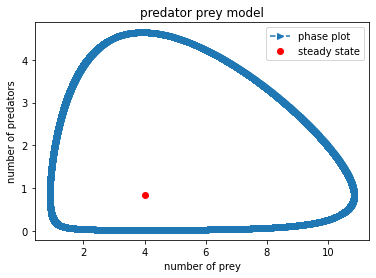

In [40]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Comparing the Runga Kutta to the Euler time step methods:

    The Runga Kutta Method seems to cater towards a model that stays in balance. 
    
    When plotting time vs population growth, using the Euler time step, you can see how over the time the population of both the prey and predators keeps on increasing slightly. This is further highlighted by the prey vs predator model in which the growth of the populations is highlighted by the outward growth of the predator-prey cycle. 
    
    Using the Runga Kutta method, however, maintains the steady population levels through the population growth cycles. In the time vs population growth graph, the maximum population level remains as the max throughout the population cycles. In the prey vs predators graph, there is no outward growth of the cycle, and the cycle is depicted as one continuous loop. 

## E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

Changing alpha from 1 to 2  

In [41]:
# set the initial parameters
alpha = 2.
beta = 1.2
gamma = 4.
delta = 1.

# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) #CHANGE FROM EULER_STEP TO RUNGE KUTTA
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

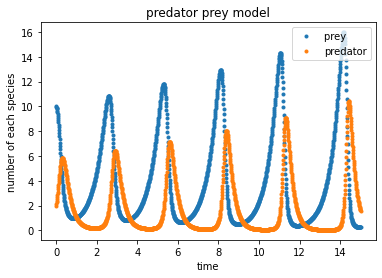

In [42]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

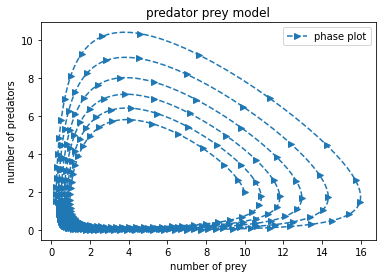

In [43]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Changing alpha:

    Increasing alpha increases the population growth rate of the prey. This sets a positive feedback as this increas in prey growth rate also increases the predator population since they have more to eat 

Changing Beta 

In [44]:
# set the initial parameters
alpha = 1.
beta = 1.8
gamma = 4.
delta = 1.

# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) #CHANGE FROM EULER_STEP TO RUNGE KUTTA
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

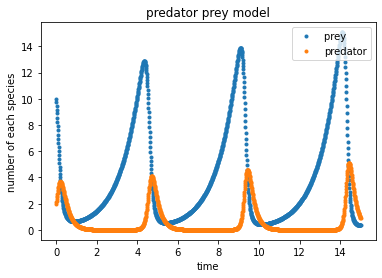

In [45]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

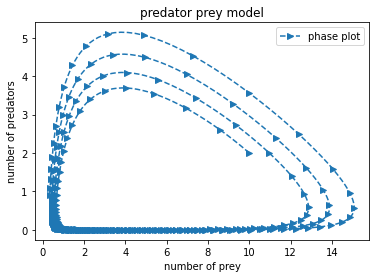

In [46]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Changing Beta:

    
    Increasing beta decreases the population of the predator, and conversely, decreasing beta increases the population of the predator

Changing gamma

In [47]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 6.
delta = 1.

# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) #CHANGE FROM EULER_STEP TO RUNGE KUTTA
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

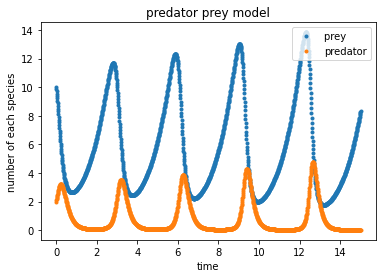

In [48]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

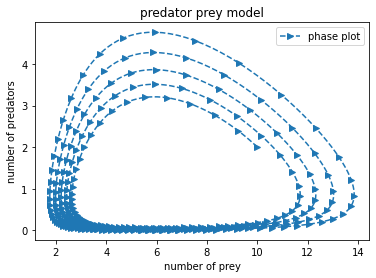

In [49]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

changing gamma:

    Increasing gamma increases the number of 'cycles' the population will gp through in a set period of time. Gamma controls the natural death/pop decrease of predators so increasing speeds up how often predators die.

Changing delta 

In [50]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.5

# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt) #CHANGE FROM EULER_STEP TO RUNGE KUTTA
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

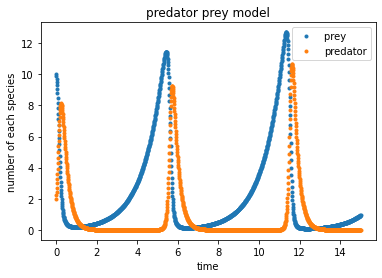

In [51]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

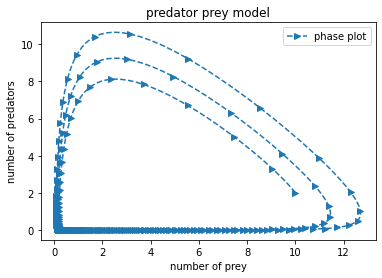

In [52]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Increasing delta increases the population numbers of the predator. Decreasing delta decreases population numbers of predator. 

## E.5 (Advanced)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example

Zombie Apocalypse 

In [53]:
from scipy.integrate import odeint

In [54]:
P = 0         #birth rate 
d = 0.0001    #natural death percent (per day)
B = 0.0095    # transmission percent (per day)
G = 0.0001    # resurect percent (per day) 
A = 0.0001    #destroy percent (per day)


In [55]:
#Solve the system dy/dt = f(y,t)

def f(y,t):
    Si = y[0]
    Zi = y[1]
    Ri = y[2]
    
    #model equations 
    f0 = P - B*Si*Zi - d*Si
    f1 = B*Si*Zi + G*Ri - A*Si*Zi
    f2 = d*Si + A*Si*Zi - G*Ri
    
    return [f0,f1,f2]

In [56]:
#initial conditions 

S0 = 500.  #initial pop
Z0 = 0     #initial zombies

R0 = 0      #initial death pop
y0 = [S0,Z0,R0]  #initial condition vector

t = np.linspace(0,5.,1000)   #time grid 

#Solve the diff eqns
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

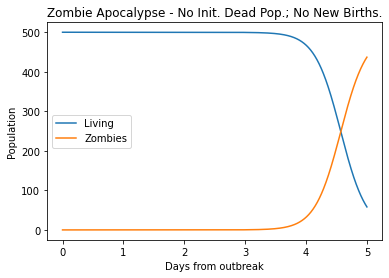

In [57]:
#plot results 
plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - No Init. Dead Pop.; No New Births.')
plt.legend(loc=0)

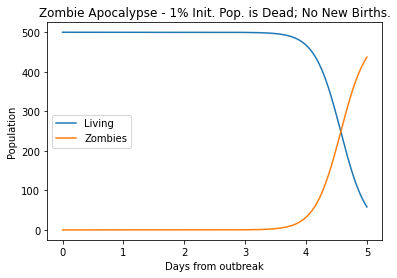

In [58]:
# CHANGE INITIAL CONDITIONS - 1 % OF INITIAL POP IS DEAD
R0 = 0.01*S0  #1%  of initial pop is dead 
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]


plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; No New Births.')
plt.legend(loc=0)

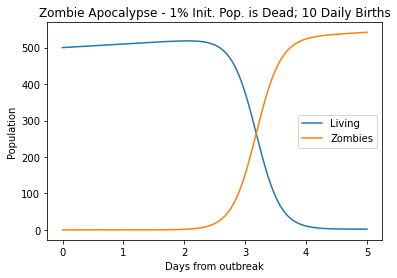

In [59]:
#CHANGE INITIAL CONDITIIONS - ADD 10 DAILY BIRTHS 
# change the initial conditions
R0 = 0.01*S0   # 1% of initial pop is dead
P  = 10        # 10 new births daily
y0 = [S0, Z0, R0]

# solve the DEs
soln = odeint(f, y0, t)
S = soln[:, 0]
Z = soln[:, 1]
R = soln[:, 2]

plt.figure()
plt.plot(t, S, label='Living')
plt.plot(t, Z, label='Zombies')
plt.xlabel('Days from outbreak')
plt.ylabel('Population')
plt.title('Zombie Apocalypse - 1% Init. Pop. is Dead; 10 Daily Births')
plt.legend(loc=0)